Data Analysis of Amazon best selling books from 2009-2022. 

TASK: 
To analyze the data obtained from the 50 best selling books from the years 2009-2022. 

Step 1: 
Importing the essential libraries. Here we'll be using different libraries for different actions. 

In [ ]:
#Improting essential libraries.
import pandas as pd
import numpy as np

#Importing librariries for data visualization. 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__) #Printing the version of the seaborn library.
sns.set_style('whitegrid')

#Importing libraries for the processing of textual data. 
import string 
import re

Seaborn verion 0.11.2


In [ ]:
#Loading the dataset.
data = pd.read_csv('book_dataset.csv')

In [ ]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [ ]:
#Now we'll convert User ratings into user_rating for the easier processing of the data and will fix some spelling errors in the dataset. 
data.rename(columns={"User Rating": "User_Rating"}, inplace=True)
data[data.Author == 'J. K. Rowling']
data[data.Author == 'J.K. Rowling']
data.loc[data.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
data['name_len'] = data['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
data['punc%'] = data['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


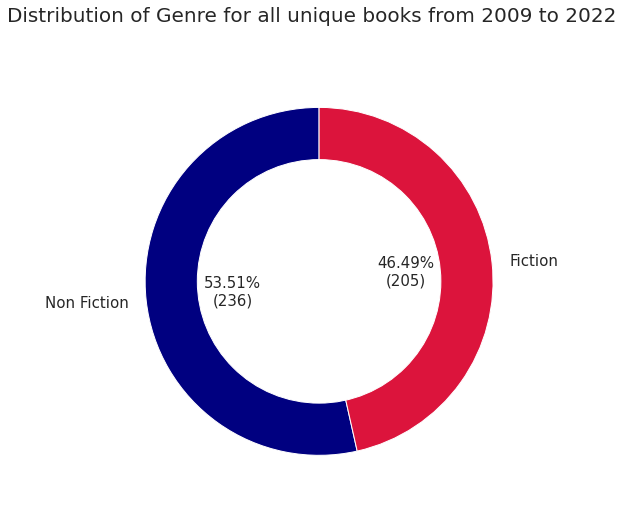

In [ ]:
#Now we'll virtually represent the data and draw essential conclusions from it. 
no_dup = data.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2022', fontsize=20)
fig.show()

Here we can see the visual representation of the data. 
The percentage of non fiction books is greater than than the fiction books which is just 46.49% from the year 2009 to 2022. 


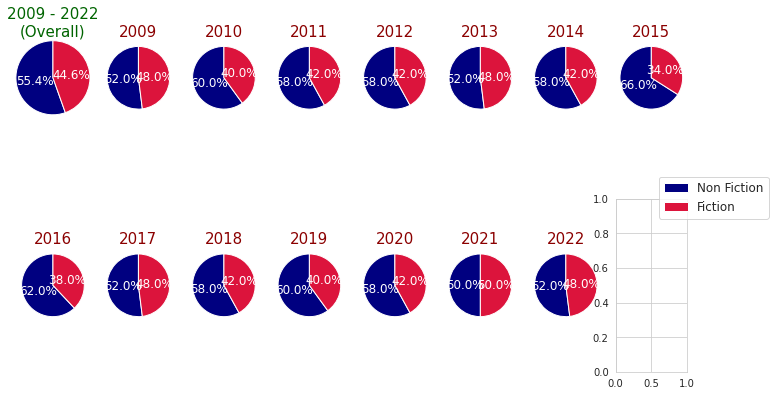

In [ ]:
#Now let's visualize the above insights according to every year.

y1 = np.arange(2009, 2016)
y2 = np.arange(2016, 2023)
g_count = data['Genre'].value_counts()

fig, ax = plt.subplots(2, 8, figsize=(12,7))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2022\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = data[data['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = data[data['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2022',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

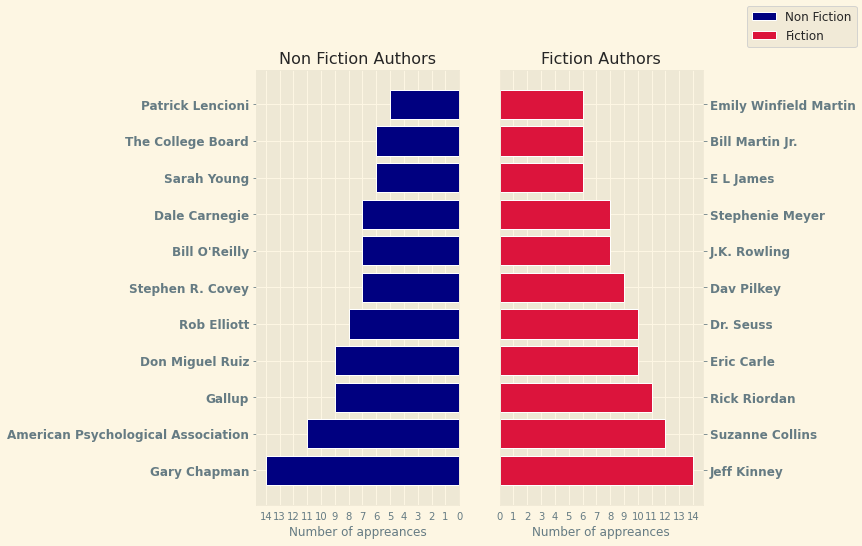

In [ ]:
best_nf_authors = data.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = data.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

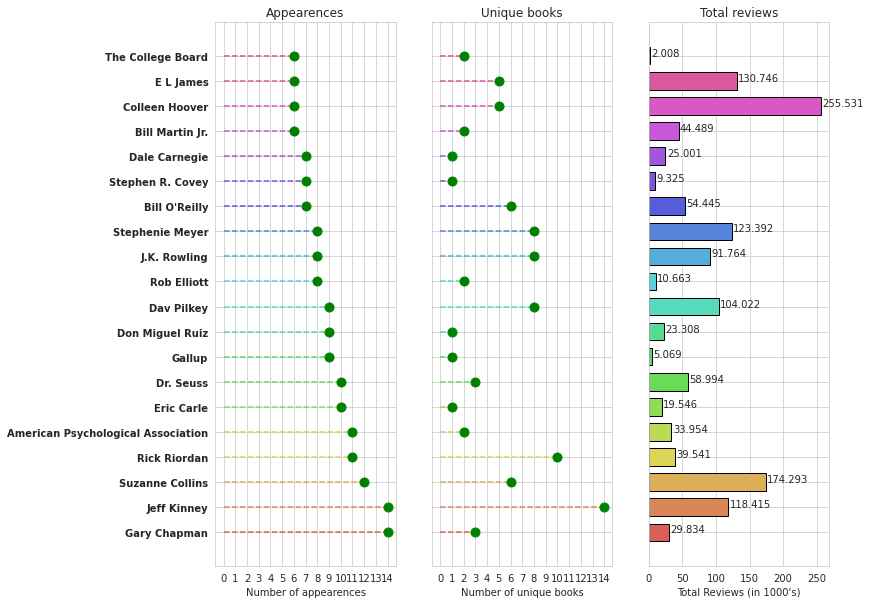

In [ ]:
n_best = 20

top_authors = data.Author.value_counts().nlargest(n_best)
no_dup = data.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()
